<a href="https://colab.research.google.com/github/Lalmani084/deep-learning/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Churn quantifies the number of customers unsubscribing/canceling the service.In this project, we would like to build a model which can help us identify the intention of customers to leave us in future.

To solve the problem of predicting customer churn, we will analyze the past data to study the characteristics/behaviour of the customers before they churned.


In [5]:
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape


(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [9]:
print('Percentage of churned customers: ', round(((1869/(5174+1869))*100),2))

Percentage of churned customers:  26.54


In [10]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df= df.dropna()

In [14]:
round(df[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


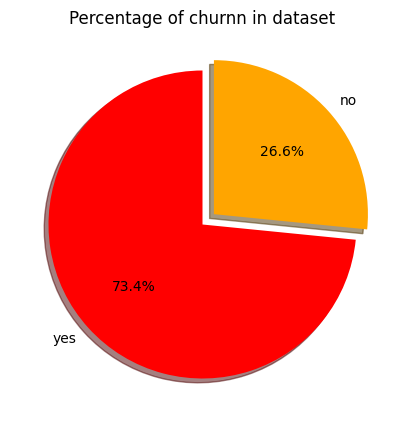

In [15]:
# lets bisualize it wiith a pie chart
data_size= df.Churn.value_counts(sort=True)
colors= ['red','orange']
rcParams['figure.figsize'] = 5,5


# for lotting

labels = 'yes', 'no'
explode= (0,0.1)
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct= '%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of churnn in dataset')
plt.show()

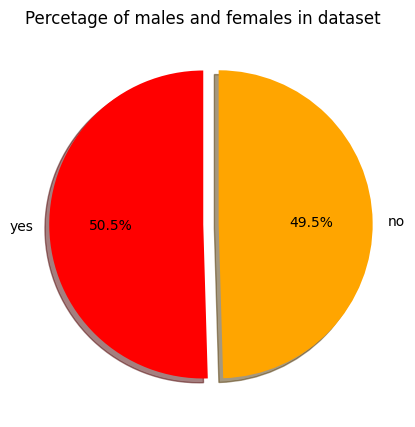

In [16]:
data_size = df.gender.value_counts(sort = True)
colors = ['red','orange']
rcParams['figure.figsize']= 5,5

# for plotting
labels= 'yes','no'
explode = (0, 0.1)
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct= '%1.1f%%', shadow=True, startangle=90,)
plt.title('Percetage of males and females in dataset')
plt.show()

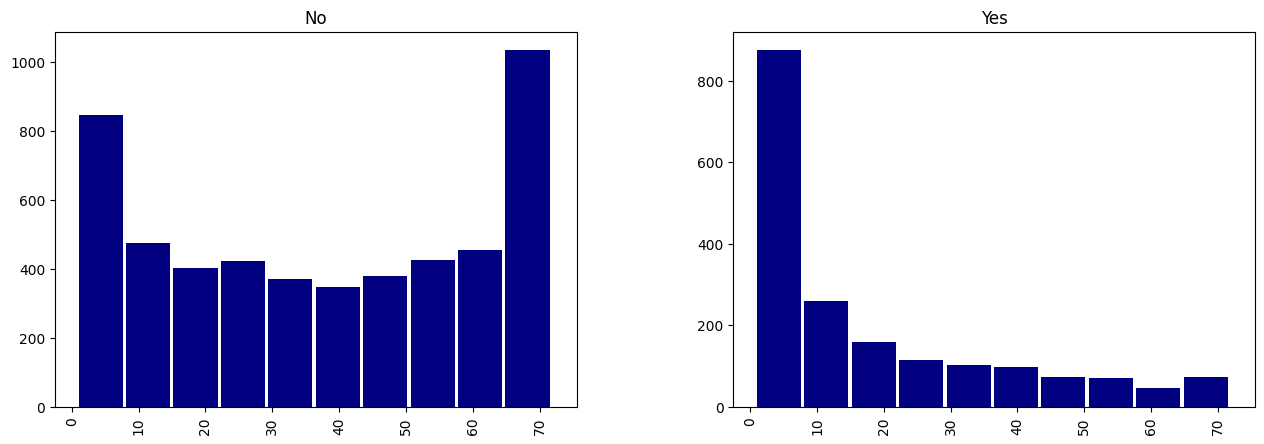

In [17]:
tenure_churn = df['tenure'].hist(by=df['Churn'],figsize=(15,5), width=6.6, color='navy')
plt.show()

<ipython-input-18-5de22f7782d7>:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  x = sns.stripplot(x="Churn", y="tenure", data=df, jitter=True, marker="D",size=4, alpha= 0.5, edgecolor="gray")


<Axes: xlabel='Churn', ylabel='tenure'>

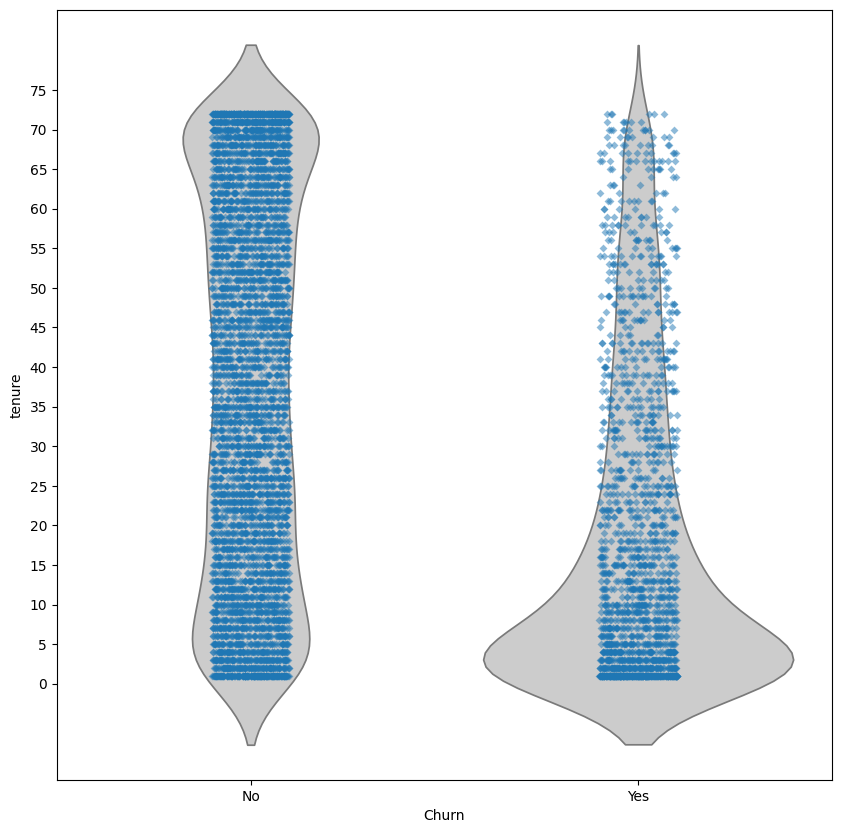

In [18]:
plt.subplots(figsize=(10,10))
x = sns.violinplot(x="Churn",y="tenure", data=df, inner=None, color="0.8")
x = sns.stripplot(x="Churn", y="tenure", data=df, jitter=True, marker="D",size=4, alpha= 0.5, edgecolor="gray")
x.set_yticks(np.arange(0,80,5))
x


In [19]:
df.isnull().values.any()

False

In [20]:
df= df.apply(LabelEncoder().fit_transform)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


In [21]:
df.corr(method="pearson")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,...,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.006823,0.004974,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,...,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,...,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,...,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,...,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,...,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,...,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,...,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,...,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,...,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050


<Axes: >

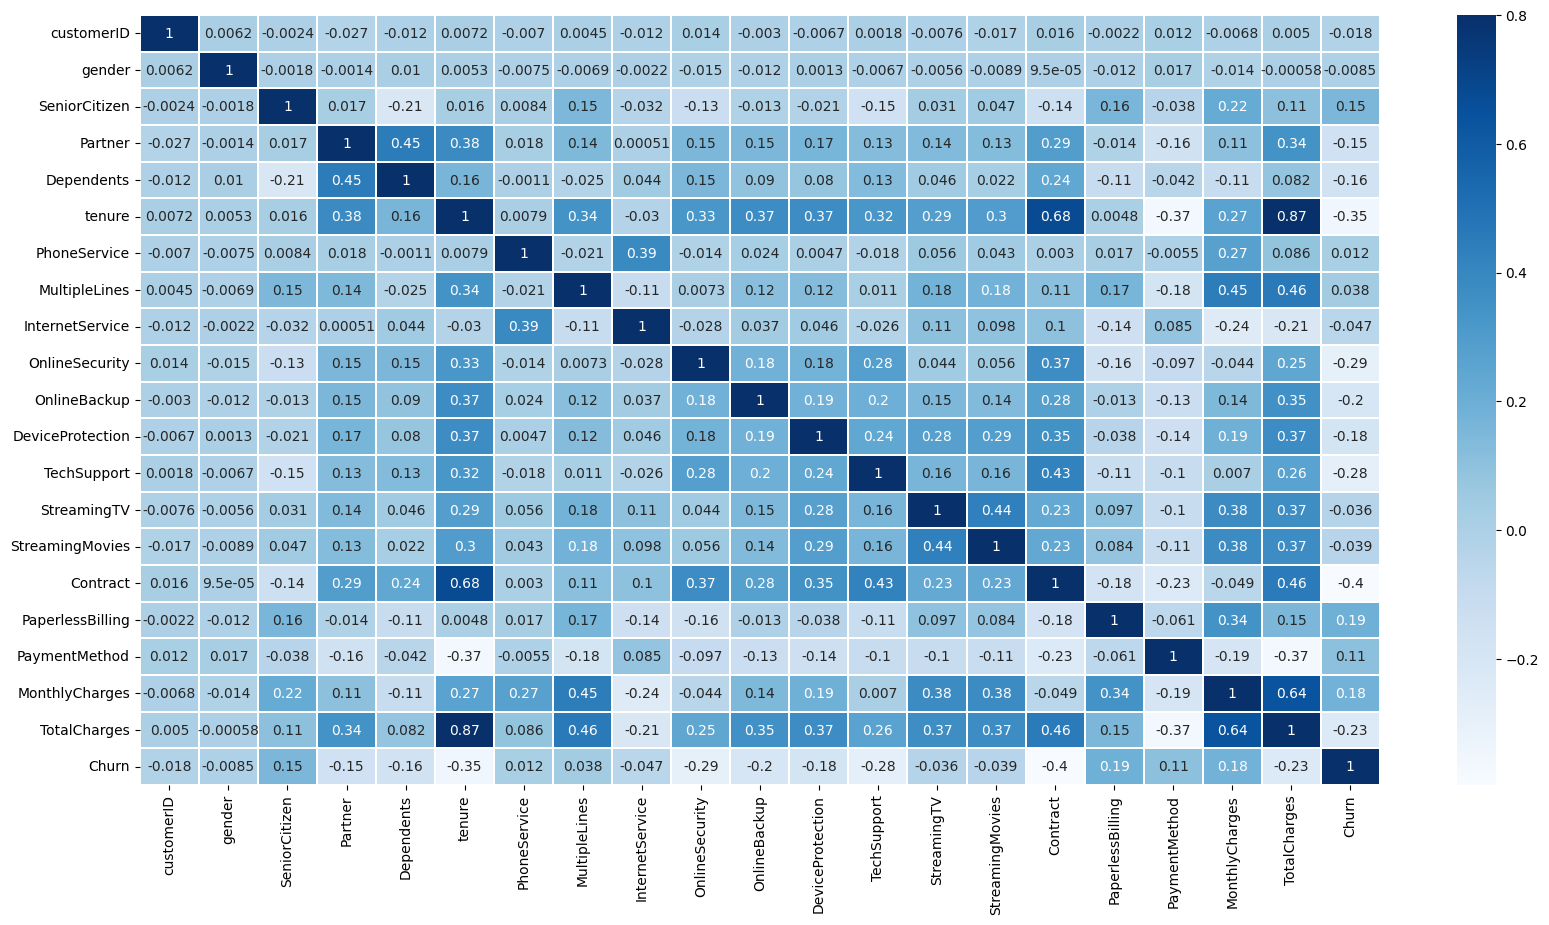

In [22]:
corr_matrix = df.corr()
f, ax=plt.subplots(figsize=(20,10))

sns.heatmap(corr_matrix, linewidths=0.1,cmap= plt.cm.Blues,linecolor="white",vmax=0.8, annot=True)


In [23]:
X =df.iloc[:,:-2]
Y=df[['Churn']]

In [24]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, stratify=Y, test_size=0.2, random_state=0)

sc= StandardScaler()
X_train_sc= sc.fit_transform(X_train)
Xtest_sc = sc.fit_transform(X_test)

In [25]:
rf = RandomForestClassifier(n_estimators =100, random_state=0)
rf.fit(X_train_sc, Y_train)
importances = rf.feature_importances_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
f_imp= pd.Series(importances, df.columns[:-2])
f_imp.sort_values(ascending=False, inplace=True)
f_imp

,0
tenure,0.184287
MonthlyCharges,0.174636
customerID,0.159938
Contract,0.089010
PaymentMethod,0.050167
OnlineSecurity,0.046148
TechSupport,0.039331
OnlineBackup,0.031309
gender,0.026775
PaperlessBilling,0.024699


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimal number of features: 15


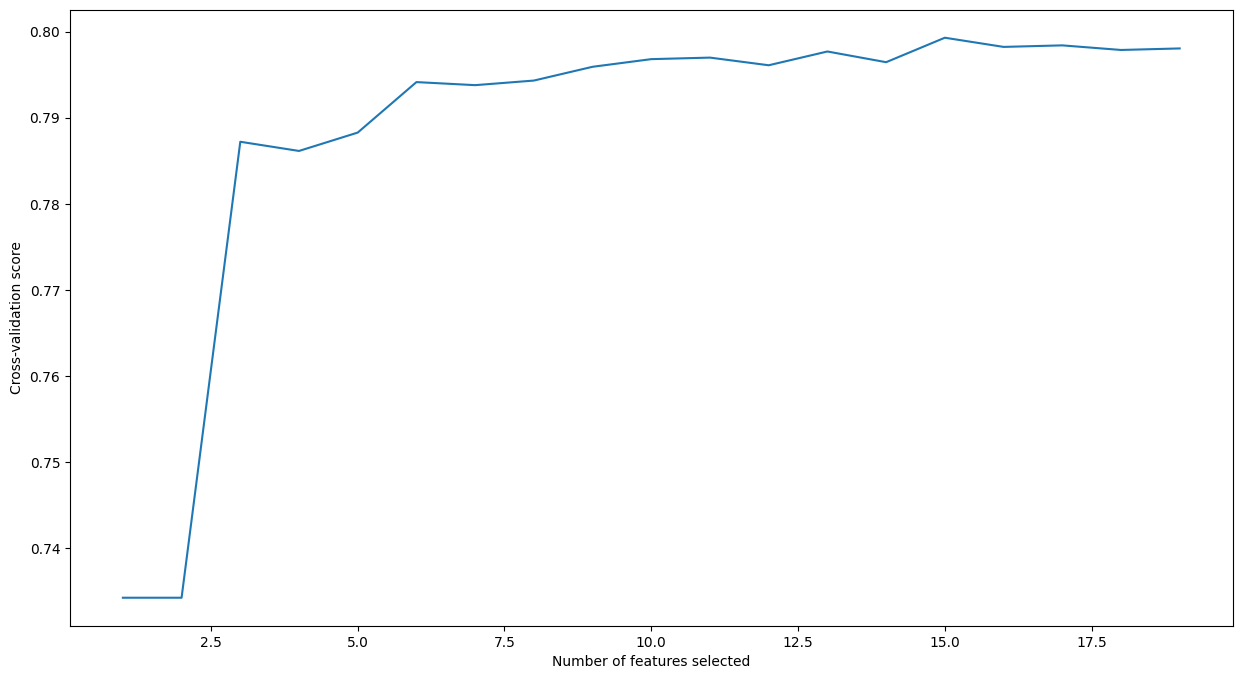

In [27]:
lr = LogisticRegression(penalty="l2", C=0.1, random_state=0)
fs = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2), scoring='accuracy')
fs.fit(X_train_sc, Y_train)

print("Optimal number of features: %d" % fs.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(fs.cv_results_['mean_test_score']) + 1), fs.cv_results_['mean_test_score'])
plt.show()


In [28]:
#We are going to use the folowing models:

#Random Forest
#Logistic Regression
#Decision Tree
#K-NN
#Gaussian Naive Bayes